<a href="https://colab.research.google.com/github/amannraawat/dog-breed-classification/blob/master/dog_breed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Dog Breed Classification

This notebook builds and end-to-end multi-class classification using Tensorflow.

## Problem

Identifying the breed of dog from the image.

## Data

The data we are using is from Dog Breed Identification Competition(Kaggle).

https://www.kaggle.com/competitions/dog-breed-identification

In [1]:
# unzip the data into the Google Drive.
# !unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

### Get Our Workspace Ready

In [2]:
# import important libraries

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
# check for GPU availability

print("GPU available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


## Get Our Data Ready (Turning into Tensors)

For machine learning models, all data has to be in numerical form. So turning our images into Tensors(numerical representations)

In [3]:
# checkout labels of our data
import pandas as pd
data = pd.read_csv('drive/My Drive/Dog Vision/labels.csv')

In [ ]:
data.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [ ]:
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

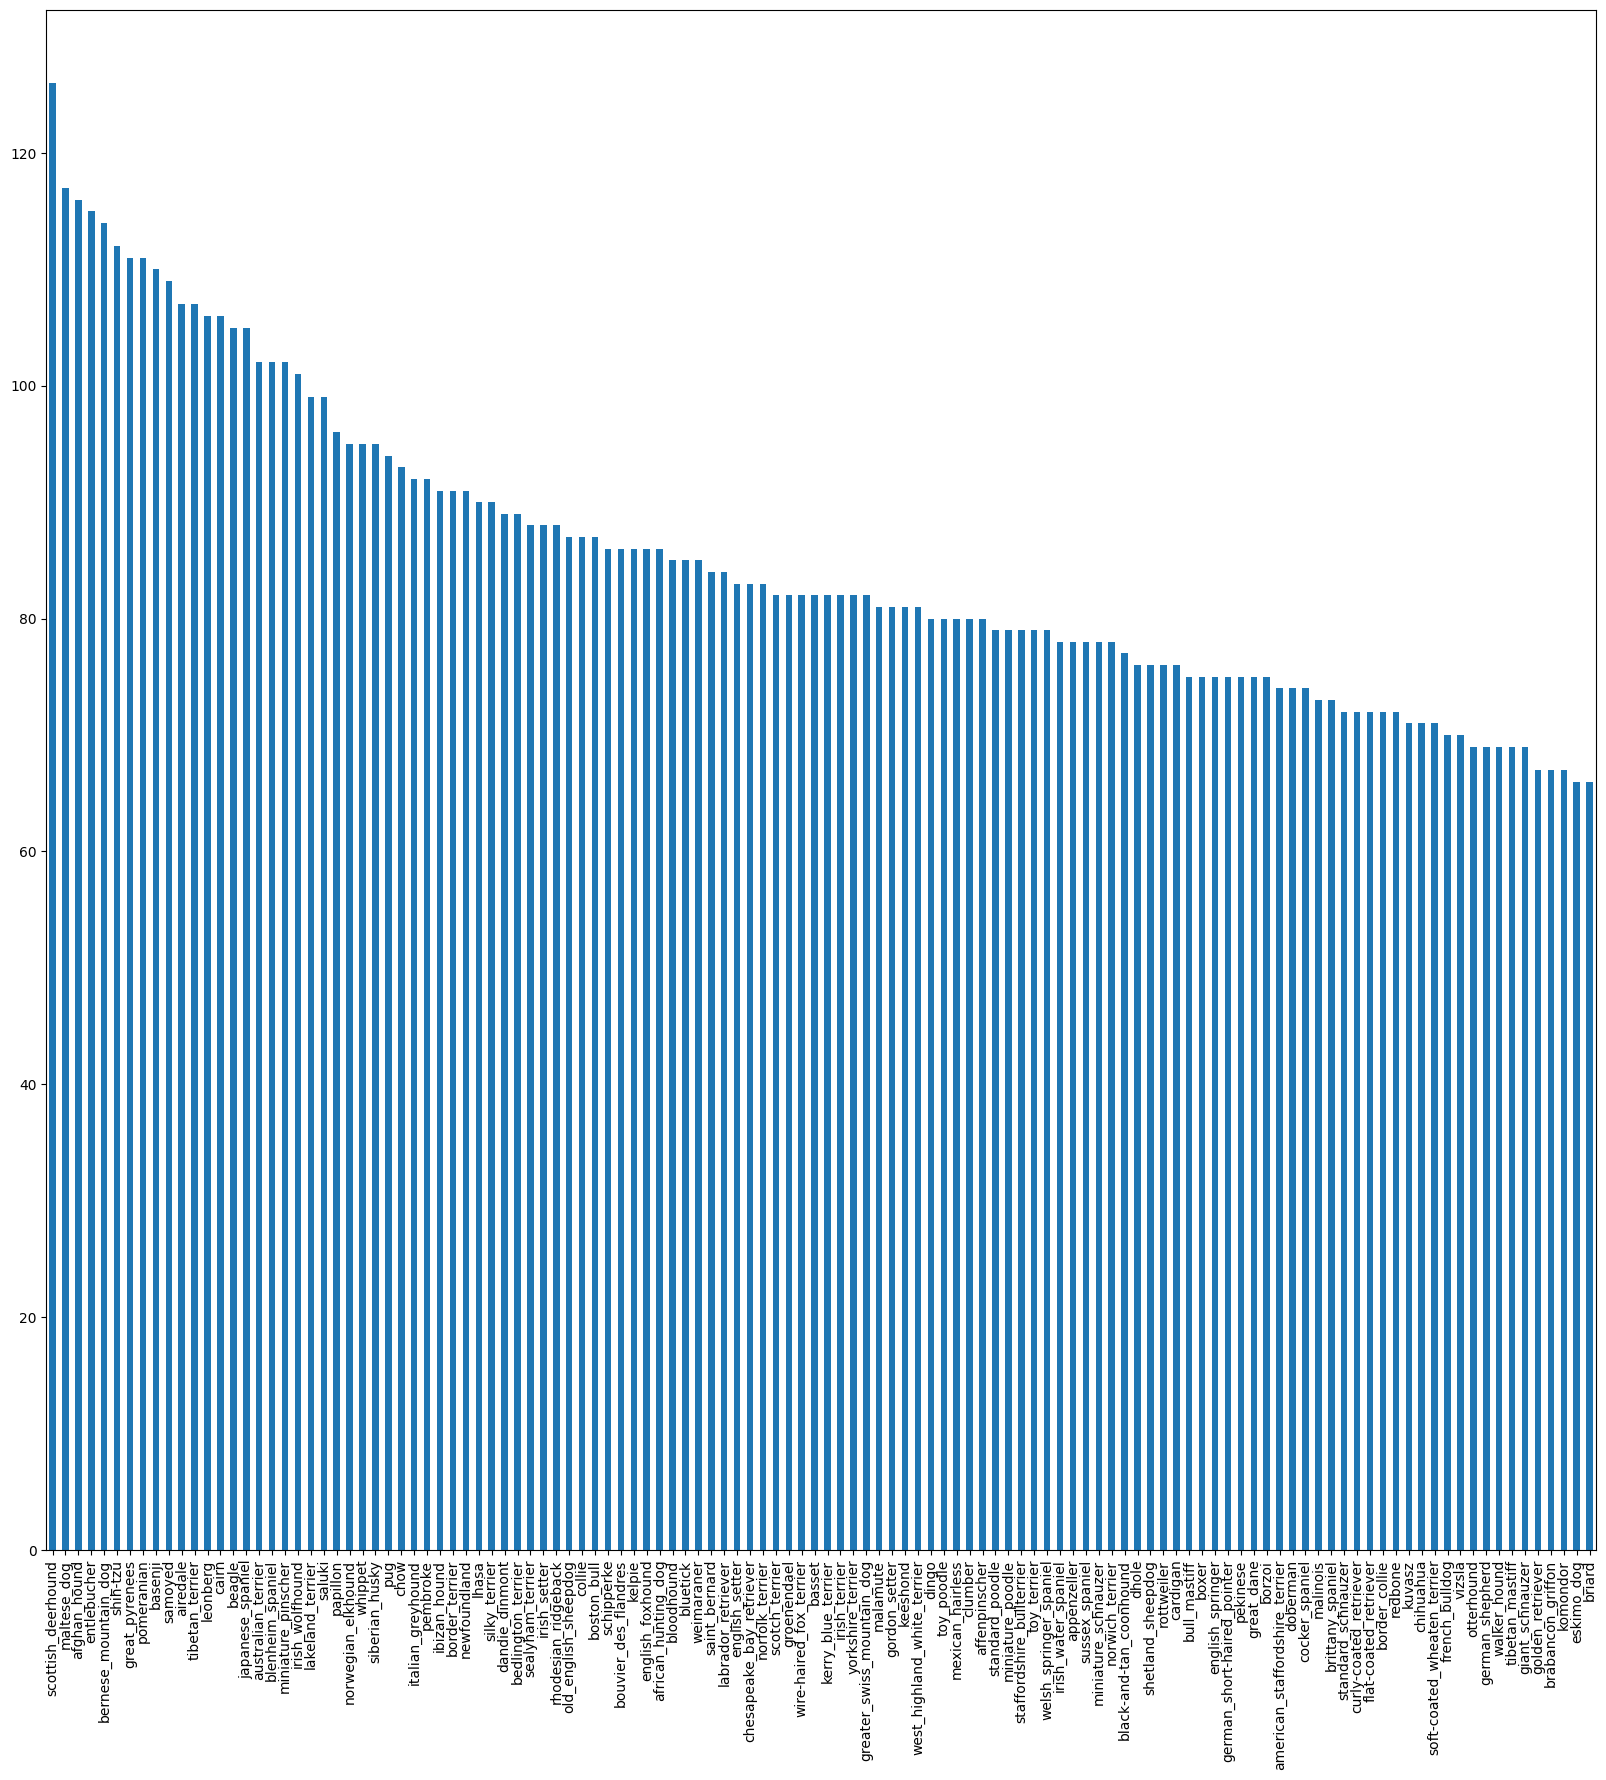

In [ ]:
data['breed'].value_counts().plot.bar(figsize=(20,20))

In [4]:
# view an image
from IPython.display import Image

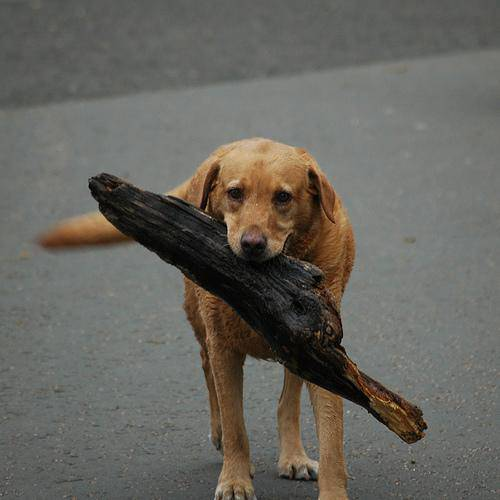

In [ ]:
Image('drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

## Get Images and their Labels

list of all image filepaths

In [5]:
filenames = ['drive/My Drive/Dog Vision/train/' + name for name in data['id'] + '.jpg']

In [ ]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [6]:
# checkout filenames matches with the actual image files
import os
if len(os.listdir('drive/My Drive/Dog Vision/train/')) == len(filenames):
  print('filenames matches with the actual images')
else:
  print('filenames do not match with the actual images')


filenames matches with the actual images


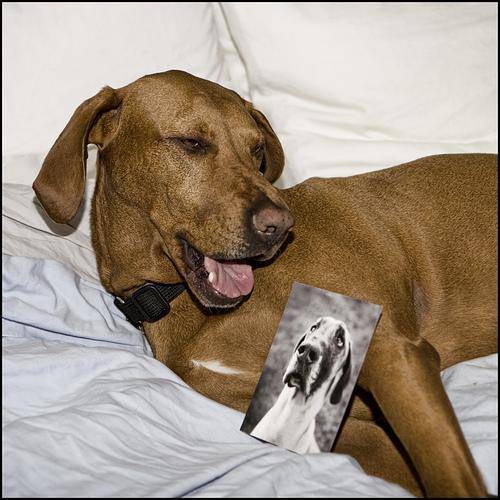

In [ ]:
 # checkout that it work fine or not
 Image(filenames[100])

In [ ]:
data['breed'][100]

'rhodesian_ridgeback'

In [7]:
# prepare our labels
import numpy as np
labels = data['breed']
labels = np.array(labels)

In [ ]:
# see labels matches with the actual images
if len(labels) == len(filenames):
  print("matches")
else:
  print("not matches")


matches


In [8]:
# checkout unique breeds
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# turn single label into array of booleans
print(labels[5])
labels[5] == unique_breeds

bedlington_terrier


array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [9]:
 # turn every label into array of booleans
boolean_labels = [label == unique_breeds for label in labels]

In [ ]:
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[1000])
print(boolean_labels[1000].astype(int))

irish_setter
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [10]:
# make x and y variables
x = filenames
y = boolean_labels

In [11]:
# reduce number of images for experimenting
IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [12]:
 # split our data into train and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:IMAGES],
                                                  y[:IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
x_train[:5], y_train[:5]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images (Turning Into Tensors)

In [13]:
#sample how a image looks after converting into tensors
from matplotlib.pyplot import imread
image = imread(filenames[5])
image.shape

(375, 500, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[143, 136, 144],
        [141, 134, 142],
        [143, 136, 144],
        ...,
        [ 82,  73,  76],
        [ 85,  76,  79],
        [ 79,  70,  73]],

       [[147, 140, 148],
        [140, 133, 141],
        [130, 123, 131],
        ...,
        [123, 117, 119],
        [127, 118, 121],
        [120, 114, 116]]], dtype=uint8)>

In [14]:
# image size
IMG_SIZE = 224

#function for preprocessing images
def process_images(image_path, img_size=IMG_SIZE):
  """
  takes an image file path and turns the image into Tensor.
  """
  # read image path
  image = tf.io.read_file(image_path)
  # turn the image into tensor with 3 colour channels(RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to desired value(224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning Our Data Into Batches

Because if we try to process 10,000 images at a time, they all might not fit into memory.

Data in the form of Tensor tuples.

In [15]:
# create a function to return a tuple

def get_image_label(image_path, label):
  """
  takes an image file path and the label, processes the image and returns a tuple.
  """
  image = process_images(image_path)
  return image, label

Upper function is a way to turn data into tuples of tensors. Now make a function which turns all of the data into batches.

In [16]:
# define batch size
BATCH_SIZE = 32

# create a function to turn data into batches.
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image(x) and label(y) pairs.
  Shuffle if it is training data.
  Also accepts its test data(no labels)
  """
  # if the data is test data, we probably don't have labels.
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch

  # if the data is validation dataset, we don't need to shuffle it.
  elif valid_data:
    print("Creating validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    #shuffling pathnames and labels before mapping
    data = data.shuffle(buffer_size=len(x))

    #create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    #turn the trainig data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch



In [17]:
#creating training and validation data batches.
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches..
Creating validation data batches..


In [ ]:
#different attributes of our data
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [18]:
import matplotlib.pyplot as plt

#function for viewing images in a data batch
def show_images(images, labels):
  """

  """
  plt.figure(figsize=(10,10))
  #loop through 20 images
  for i in range(20):
    #create subplots
    ax = plt.subplot(5,5, i+1)
    #display an image
    plt.imshow(images[i])
    #add image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #turn grid lines off
    plt.axis('off')

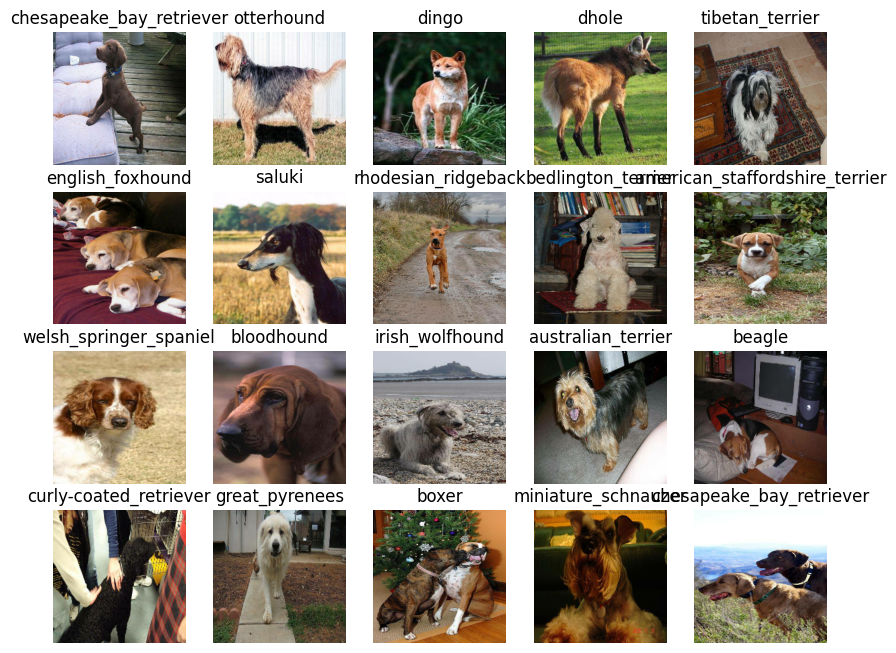

In [ ]:
#now visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

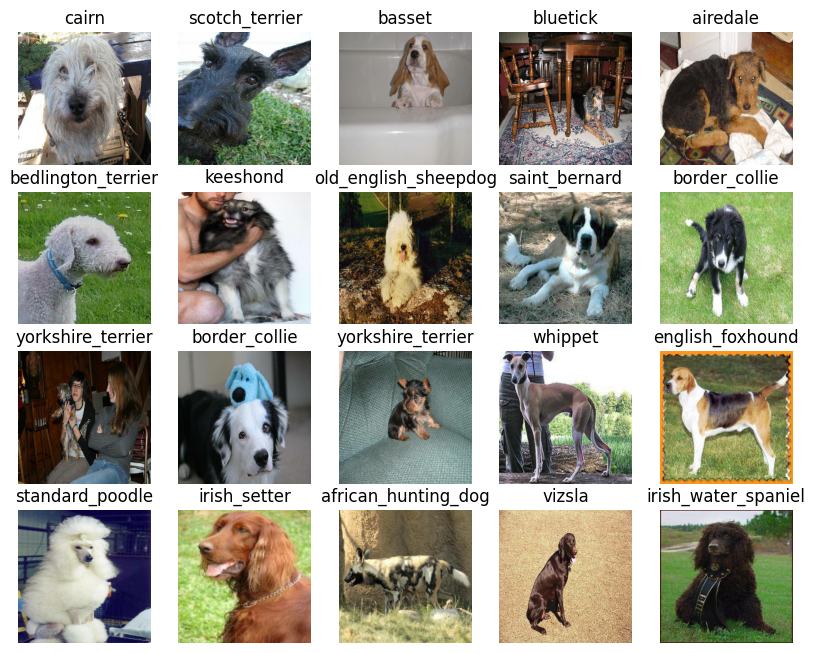

In [ ]:
#now visualize data in a validation batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

## Building A Model

Before building the model, we would to define:

* the input shape(our images shape in the form of tensors) to the model.
* the output shape(our labels shape in the form of tensors) to the model.
* the URL of the model we want to use from Tensorflow Hub.

In [19]:
#setup input shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

#setup output shape
OUTPUT_SHAPE = len(unique_breeds)

#setup model url
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2"

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [20]:
# create a function which builds a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  #setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #input layer
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") #output layer
  ])

  #compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [21]:
model = create_model()
model.summary()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating Callbacks

Functions a model can use during training to save its progress, check
its progress or stop training early if model is not improving.

We will create two callbacks, one for Tensorboard which helps track our models and another for early stopping which stops our model from training for too long.

## Tensorboard Callback

for this, we have to setup two things:
* load the tensorboard notebook extension
* create a tensorboard callback which is able to save logs to a directory and pass it to the model's fit function.

In [22]:
# tensorboard notebook extension
%load_ext tensorboard

In [23]:
import datetime

def create_tensorboard_callback():
  #create a log directory for storing tensorboard logs
  logdir = os.path.join('drive/My Drive/Dog Vision/logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S')) #logs get tracked whenever we run an experiment.

  return tf.keras.callbacks.TensorBoard(logdir)


## Early Stopping Callback

It helps our model from overfitting by stopping training if our model stops improving.

In [24]:
#create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training A Model

First our aim is to train 1000 images so that we can see our model is doing prefect.

In [25]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [26]:
#check if we are still running on GPU
print("GPU", "available (YESSS!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (YESSS!!)


In [27]:
#build a function to train and return a trained model
def train_model():
  #create model
  model = create_model()

  #create tensorboard session everytime we train the model
  tensorboard = create_tensorboard_callback()

  #fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  #return the fitted model
  return model

In [ ]:
#fit the model
model = train_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Epoch 1/100
25/25 [==============================] - 316s 12s/step - loss: 4.6082 - accuracy: 0.0950 - val_loss: 3.5563 - val_accuracy: 0.2900
Epoch 2/100
25/25 [==============================] - 3s 127ms/step - loss: 1.6432 - accuracy: 0.6812 - val_loss: 2.2741 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 2s 90ms/step - loss: 0.5611 - accuracy: 0.9463 - val_loss: 1.7499 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 2s 98ms/step - loss: 0.2525 - accuracy: 0.9875 - val_loss: 1.5517 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 2s 89ms/step - loss: 0.1457 - accuracy: 0.9962 - val_loss: 1.4854 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 3s 133ms/step - loss: 0.0997 - accuracy: 0.9987 - val_loss: 1.4471 - val_accuracy: 0.6550
Epoch 

## Evaluating Predictions Using a Trained Model

In [ ]:
#Make predictions on the validation data

predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 113ms/step


array([[1.2880175e-03, 4.5206834e-05, 1.3994165e-04, ..., 4.1574801e-04,
        1.8534898e-05, 3.7713775e-03],
       [1.2814477e-03, 4.7343713e-04, 5.7395217e-03, ..., 2.7993997e-04,
        8.1950100e-04, 4.8895180e-04],
       [5.4763605e-06, 2.0609477e-04, 4.6792527e-05, ..., 3.9178882e-05,
        1.3091669e-05, 4.4221440e-05],
       ...,
       [1.2108034e-05, 6.4146216e-06, 1.2338451e-05, ..., 2.5434263e-06,
        2.4392200e-04, 6.3578714e-06],
       [5.1778969e-03, 3.0848919e-04, 3.9282721e-05, ..., 1.7603111e-04,
        3.7830498e-05, 6.9396771e-03],
       [5.5325235e-04, 3.3800632e-05, 9.8601938e-04, ..., 3.1410505e-03,
        2.2882748e-04, 1.8971687e-05]], dtype=float32)

In [ ]:
#first prediction

print(predictions[0])
print(f"Max value probability of prediction: {np.max(predictions[0])}" )
print(f"Sum of total probability: {np.sum(predictions[0])}")
print(f"Max Index: {np.argmax(predictions[0])}")
print(f"Predicted Label: {unique_breeds[np.argmax(predictions[0])]}")

[7.24468555e-04 2.05106975e-04 4.33680718e-04 9.26240828e-05
 1.16017865e-04 1.44609541e-04 1.08249160e-02 5.14281215e-04
 1.01320053e-04 3.41024250e-04 5.84258349e-04 1.88796621e-04
 4.45351005e-04 8.82924724e-05 3.45322478e-04 4.18109848e-05
 1.35145776e-04 3.14809322e-01 3.42568637e-05 5.11999569e-05
 4.13250551e-03 8.89221774e-05 1.65712263e-05 1.19392562e-03
 3.05628600e-05 2.95894220e-04 1.27545267e-01 5.52544407e-05
 7.77390960e-04 8.61396140e-04 2.39555622e-04 2.50302651e-03
 5.22464688e-04 4.25730614e-05 1.32317364e-04 2.89608557e-02
 2.56272233e-05 1.53304907e-04 3.39504128e-04 1.71606680e-05
 1.24974619e-03 1.43286643e-05 2.08058671e-04 1.87744899e-05
 9.31188406e-05 1.72567656e-04 1.96636593e-05 2.84440121e-05
 7.07912986e-05 9.41233666e-05 5.52450598e-04 2.00080522e-05
 3.04485002e-04 2.72931415e-04 6.28443144e-04 4.45361402e-05
 1.32616653e-04 3.04460898e-03 1.10652833e-03 7.33579919e-02
 1.09616944e-04 9.65068466e-06 4.17822099e-04 1.02095335e-04
 1.15629937e-03 4.306904

In [ ]:
unique_breeds[59]

'irish_wolfhound'

In [ ]:
#Turn predictions into their respective labels
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
#get a predicted label based on an array of prediction
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [ ]:
#create a function to unbatch a batch dataset
def unbatch(data):
  images = []
  labels = []

  for image, label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [ ]:
#unbatch validation data
val_images, val_labels = unbatch(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(val_labels[69])

'airedale'

## Visualize Model Predictions

In [ ]:
#function to visualize predictions and how much it is correct.
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  #plot image
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #change colour if prediction is correct or wrong
  if pred_label == true_label:
    color='green'
  else:
    color='red'


  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)

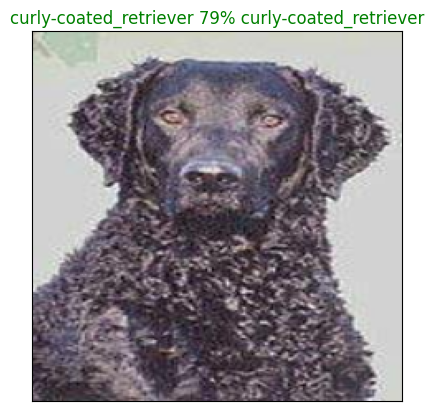

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=76)

## Saving and Reloading A Trained Model

In [28]:
#create a function to save the model
def save_model(model, suffix=None):
  """
  saves a model in models directory.
  """
  #create a model directory with the current time.
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))

  #save format of model
  model_path = modeldir + "-" + suffix + ".keras"
  print(f"Saving model to: {model_path}")
  model.save(model_path)
  return model_path



In [29]:
#create a function to load the model
def load_model(model_path):
  """
  Loads a model from the specified path.
  """
  print(f"Loading model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
#save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2")

Saving model to: drive/My Drive/Dog Vision/models/20240102-04541704171299-1000-images-mobilenetv2.keras


'drive/My Drive/Dog Vision/models/20240102-04541704171299-1000-images-mobilenetv2.keras'

In [30]:
#load the trained model
loaded_model = load_model('drive/My Drive/Dog Vision/models/20240102-04541704171299-1000-images-mobilenetv2.keras')

Loading model from: drive/My Drive/Dog Vision/models/20240102-04541704171299-1000-images-mobilenetv2.keras


In [ ]:
#evaluate presaved model
model.evaluate(val_data)

7/7 [==============================] - 1s 102ms/step - loss: 1.3067 - accuracy: 0.6750


[1.306721806526184, 0.675000011920929]

In [ ]:
#evaluate saved model
loaded_model.evaluate(val_data)

7/7 [==============================] - 1s 69ms/step - loss: 1.1834 - accuracy: 0.7150


[1.1834356784820557, 0.7149999737739563]

## Training On the Full Data

In [ ]:
x[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#create data batch with the full dataset
full_data = create_data_batches(x, y)
full_data

Creating training data batches..


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#create a model for full data
full_model = create_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2


In [ ]:
#create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

In [ ]:
#fit the full model
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 3585s 11s/step - loss: 1.3221 - accuracy: 0.6718
Epoch 2/100
320/320 [==============================] - 28s 88ms/step - loss: 0.3944 - accuracy: 0.8878
Epoch 3/100
320/320 [==============================] - 27s 83ms/step - loss: 0.2378 - accuracy: 0.9336
Epoch 4/100
320/320 [==============================] - 26s 82ms/step - loss: 0.1536 - accuracy: 0.9626
Epoch 5/100
320/320 [==============================] - 28s 88ms/step - loss: 0.1045 - accuracy: 0.9779
Epoch 6/100
320/320 [==============================] - 29s 90ms/step - loss: 0.0764 - accuracy: 0.9869
Epoch 7/100
320/320 [==============================] - 29s 90ms/step - loss: 0.0588 - accuracy: 0.9916
Epoch 8/100
320/320 [==============================] - 27s 85ms/step - loss: 0.0451 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 27s 84ms/step - loss: 0.0370 - accuracy: 0.9957
Epoch 10/100
320/320 [==============================] - 28s 86ms/step - 

In [ ]:
save_model(full_model, suffix='full-image-set-mobilenetv2-model')

Saving model to: drive/My Drive/Dog Vision/models/20240104-05261704346019-full-image-set-mobilenetv2-model.keras


'drive/My Drive/Dog Vision/models/20240104-05261704346019-full-image-set-mobilenetv2-model.keras'

In [31]:
#load the full model
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20240104-05261704346019-full-image-set-mobilenetv2-model.keras')

Loading model from: drive/My Drive/Dog Vision/models/20240104-05261704346019-full-image-set-mobilenetv2-model.keras


## Making Predictions on the Test Data

In [34]:
#laod test filenames
test_path = 'drive/My Drive/Dog Vision/test/'
test_filenames = [test_path + name for name in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/dfe03aa0ae066e09cdda6e7f6e08390a.jpg',
 'drive/My Drive/Dog Vision/test/dd539ec1933bc47bc80b1447a26aef45.jpg',
 'drive/My Drive/Dog Vision/test/e292584f17fa7cea7f95bdadecde0ebb.jpg',
 'drive/My Drive/Dog Vision/test/e6999e18a8e98f7fc33cf520d26ec521.jpg',
 'drive/My Drive/Dog Vision/test/e4e71046e4dce90d4b4790e9819d2d82.jpg',
 'drive/My Drive/Dog Vision/test/de30e8d3cfd89cb021800007879f271b.jpg',
 'drive/My Drive/Dog Vision/test/ddf48fc0d3f0719c40332708c331a9ab.jpg',
 'drive/My Drive/Dog Vision/test/e0295b9b1bee725d52d74f9af84092cf.jpg',
 'drive/My Drive/Dog Vision/test/e30a97eb637239e3b15c903529e04800.jpg',
 'drive/My Drive/Dog Vision/test/e5c0666aa15120eba4718ae947a52c45.jpg']